In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [ ]:
data = pd.read_csv("/IRIS.csv")
print("First few rows of the dataset:")
print(data.head())
print("\nDataset columns:")
print(data.columns)
print("\nDataset shape:")
print(data.shape)
print("\nDataset information:")
print(data.info())
print("\nDataset description:")
print(data.describe())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset columns:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Dataset shape:
(150, 5)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.shape

(150, 5)

In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
result_data = []
for class_name in data['species'].unique():
    class_data = data[data['species'] == class_name]
    for feature in data.columns[:-1]:
        feature_data = class_data[feature]
        mean_value = feature_data.mean()
        median_value = feature_data.median()
        mode_value = feature_data.mode().iloc[0] if not feature_data.mode().empty else float('nan')
        std_dev_value = round(feature_data.std(), 2)
        variance_value = round(feature_data.var(), 2)
        mid_range_value = (feature_data.min() + feature_data.max()) / 2
        result_data.append([class_name, feature, mean_value, median_value, mode_value, std_dev_value, variance_value, mid_range_value])

columns = ['Class', 'Feature', 'Mean', 'Median', 'Mode', 'Std_Dev', 'Var', 'Mid_Range']
result_df = pd.DataFrame(result_data, columns=columns)

for class_name in data['species'].unique():
    class_table = result_df[result_df['Class'] == class_name]
    print(f"\nTable for Class: {class_name}")
    print(class_table)


Table for Class: Iris-setosa
         Class       Feature   Mean  Median  Mode  Std_Dev   Var  Mid_Range
0  Iris-setosa  sepal_length  5.006     5.0   5.0     0.35  0.12       5.05
1  Iris-setosa   sepal_width  3.418     3.4   3.4     0.38  0.15       3.35
2  Iris-setosa  petal_length  1.464     1.5   1.5     0.17  0.03       1.45
3  Iris-setosa   petal_width  0.244     0.2   0.2     0.11  0.01       0.35

Table for Class: Iris-versicolor
             Class       Feature   Mean  Median  Mode  Std_Dev   Var  \
4  Iris-versicolor  sepal_length  5.936    5.90   5.5     0.52  0.27   
5  Iris-versicolor   sepal_width  2.770    2.80   3.0     0.31  0.10   
6  Iris-versicolor  petal_length  4.260    4.35   4.5     0.47  0.22   
7  Iris-versicolor   petal_width  1.326    1.30   1.3     0.20  0.04   

   Mid_Range  
4       5.95  
5       2.70  
6       4.05  
7       1.40  

Table for Class: Iris-virginica
             Class       Feature   Mean  Median  Mode  Std_Dev   Var  \
8   Iris-virgin

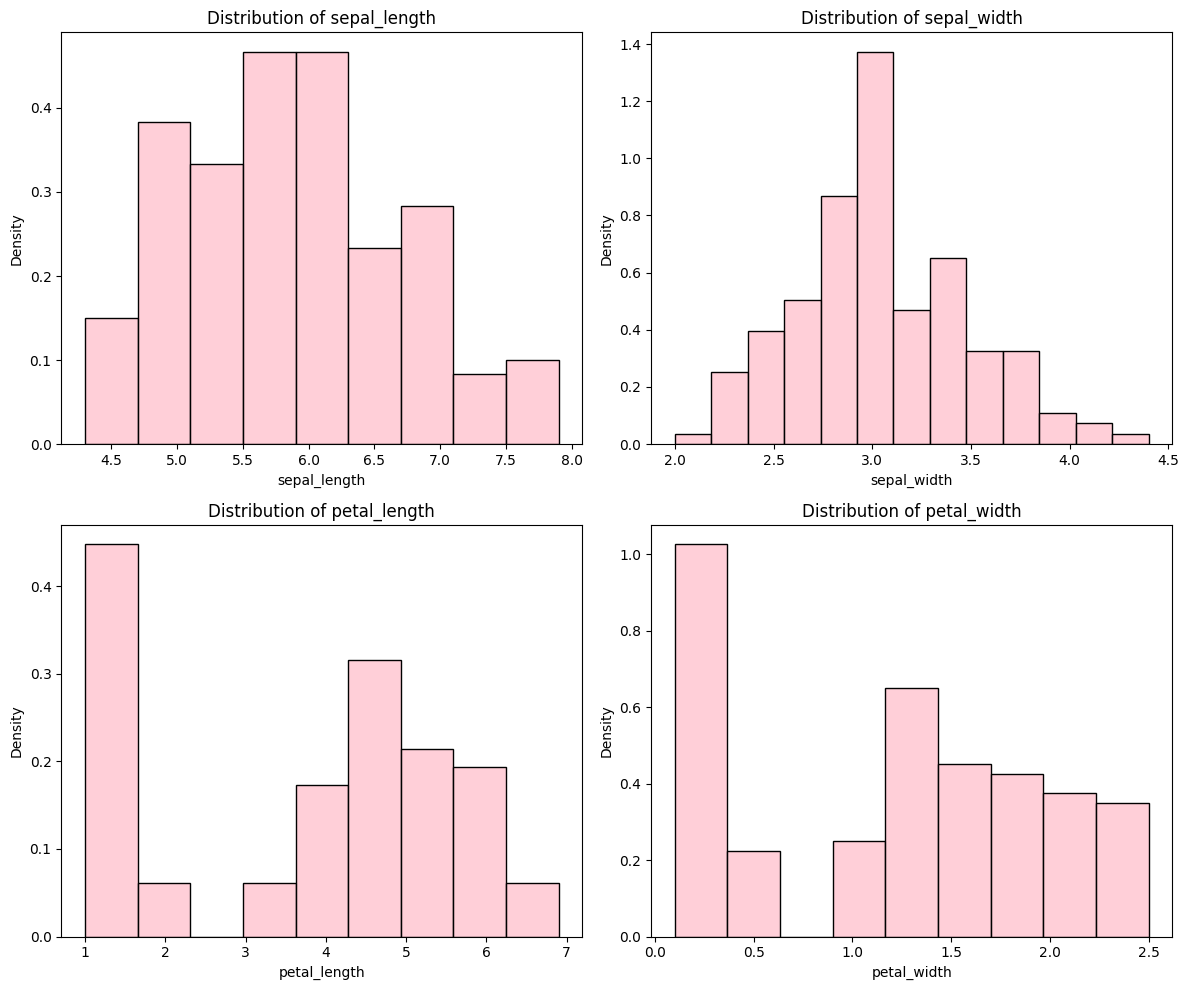

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], stat="density", linewidth=1, color='pink')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

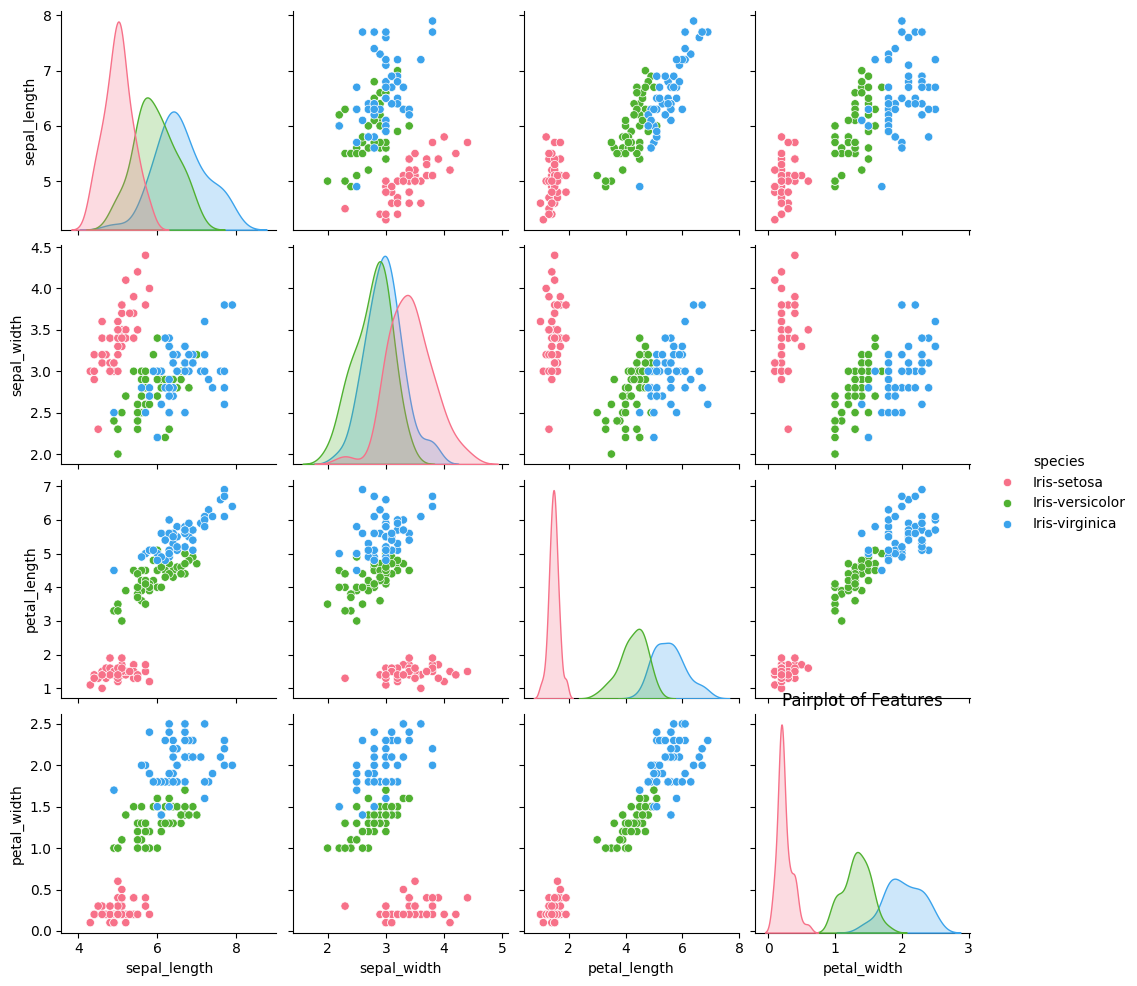

In [ ]:
sns.pairplot(data, hue='species', palette='husl')
plt.title('Pairplot of Features')
plt.show()

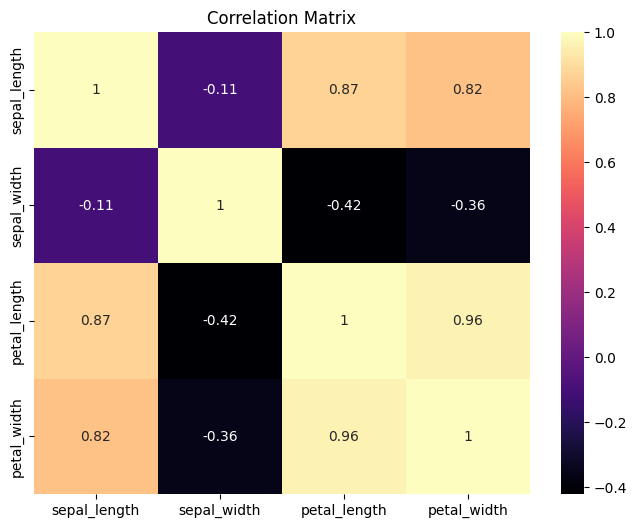

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
species_names = iris.target_names

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize classifiers
svm_clf = SVC()
knn_clf = KNeighborsClassifier()
dtree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [ ]:
#Train and evaluate each classifier
classifiers = {'Support Vector Machine': svm_clf, 'KNN': knn_clf, 'Decision Tree': dtree_clf, 'Random Forest': rf_clf}
for name, clf in classifiers.items():

    # Train the model on the training data
    clf.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)
#Convert numerical labels to species names
y_test_species = [species_names[label] for label in y_test]
y_pred_species = [species_names[label] for label in y_pred]

In [ ]:
# Evaluate the model using accuracy score
print(f"\nModel : {name}")
print(f"Accuracy:", accuracy_score(y_test_species, y_pred_species))
# Print classification report for each model
print(f"\nClassification Report:")
print(classification_report(y_test_species, y_pred_species))



Model : Random Forest
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
# Print confusion matrix for each model
print(f"Confusion Matrix:")
print(confusion_matrix(y_test_species, y_pred_species))
print("=" * 100)

Confusion Matrix:


NameError: name 'confusion_matrix' is not defined